# Importing Financial Data with Python

In [1]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

/opt/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime(2010,1,1)
end = datetime(2030,1,1)
gdp = web.DataReader('GDP','fred',start,end)

In [3]:
SP500 = web.DataReader('SP500','fred',start,end)
#SP500 = web.DataReader(['SP500',"DJ"],'fred',start,end) return more!

In [4]:
#This code moves rows up one to have yesterdays close and the current days close in the same row. Than takes the difference to calculate a percent chagne
SP500['daily_return'] = (SP500['SP500']/ SP500['SP500'].shift(1)) -1

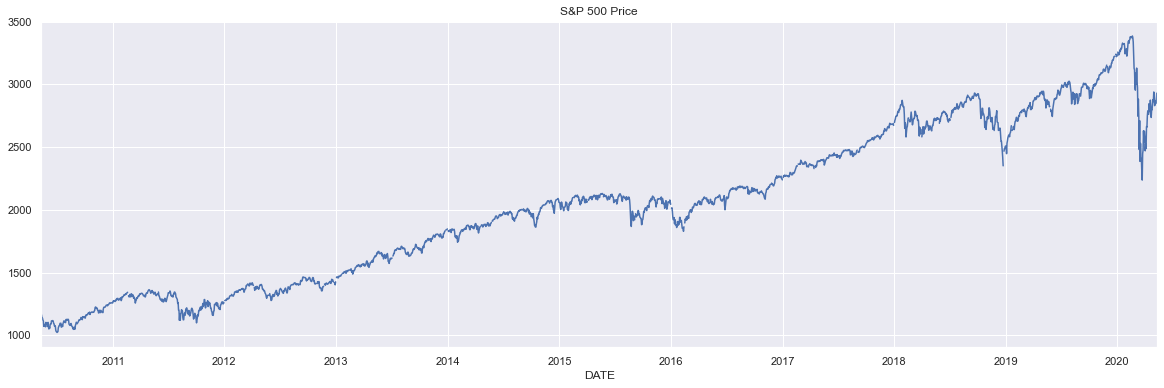

In [37]:
sns.set() #run this to overide matplotlib
SP500['SP500'].plot(title='S&P 500 Price',figsize=(20, 6))

Graphing single lines are interesting but you can view the charts directly on the FRED website. Analysis is more interesting when we can identify trends and correlations. The next section explores how to that.

# Plotting multiple lines on the same chart

Looking at individual charts is interesting but the real power of charting is when we can overlay two charts and find correlations between them. Below are some examples of charts with some interesting correlations. 

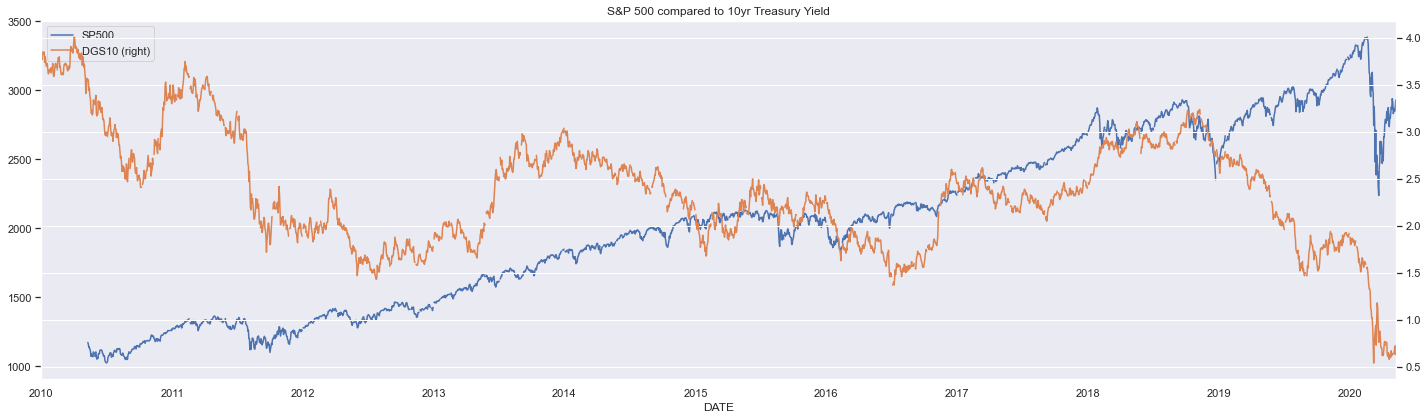

In [38]:
SP500_10yrtreasury = web.DataReader(['SP500',"DGS10"],'fred',start,end)
SP500_10yrtreasury.plot(title = 'S&P 500 compared to 10yr Treasury Yield', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()
plt.show()

In [16]:
unemployment = web.DataReader(['UNRATE',"CIVPART"],'fred',datetime(1970,1,1),datetime(2030,1,1))

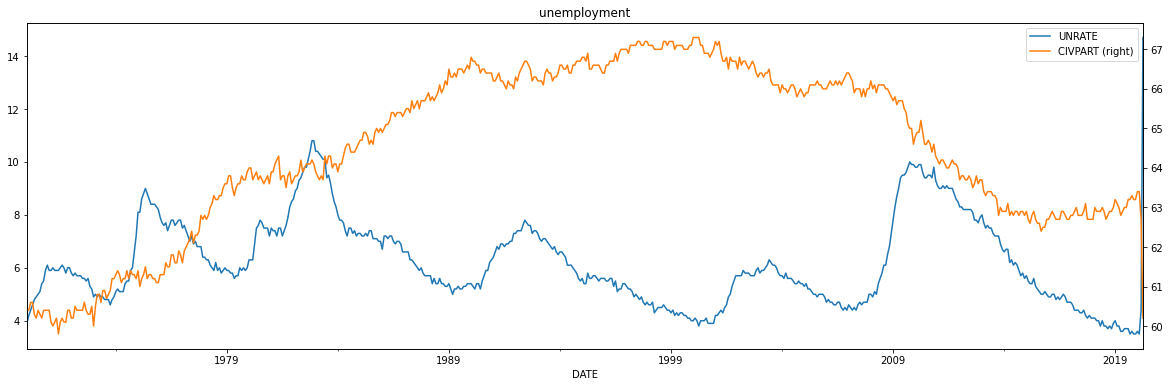

In [32]:
unemployment.plot(title = 'unemployment', secondary_y = 'CIVPART', figsize=(20, 6))